Using backend: tensorflow.compat.v1
Other supported backends: tensorflow, pytorch, jax, paddle.
paddle supports more examples now and is recommended.



Instructions for updating:
non-resource variables are not supported in the long term


sin(5⋅x)

Compiling model...
Building feed-forward neural network...
'build' took 0.046507 s


'compile' took 0.338327 s

Training model...

Step      Train loss    Test loss     Test metric
0         [5.51e-01]    [5.51e-01]    []  
1000      [8.09e-03]    [8.09e-03]    []  
2000      [8.55e-04]    [8.55e-04]    []  
3000      [2.02e-04]    [2.02e-04]    []  
4000      [1.07e-04]    [1.07e-04]    []  
5000      [6.47e-05]    [6.47e-05]    []  
6000      [4.11e-05]    [4.11e-05]    []  
7000      [2.62e-05]    [2.62e-05]    []  
8000      [1.73e-05]    [1.73e-05]    []  
9000      [4.88e-05]    [4.88e-05]    []  
10000     [7.20e-06]    [7.20e-06]    []  

Best model at step 10000:
  train loss: 7.20e-06
  test loss: 7.20e-06
  test metric: []

'train' took 3.762895 s

Saving loss history to c:\Users\yesda\Desktop\PINN File\PINN Examples\loss.dat ...
Saving training data to c:\Users\yesda\Desktop\PINN File\PINN Examples\train.dat ...
Saving test data to c:\Users\yesda\Desktop\PINN File\PINN Exam

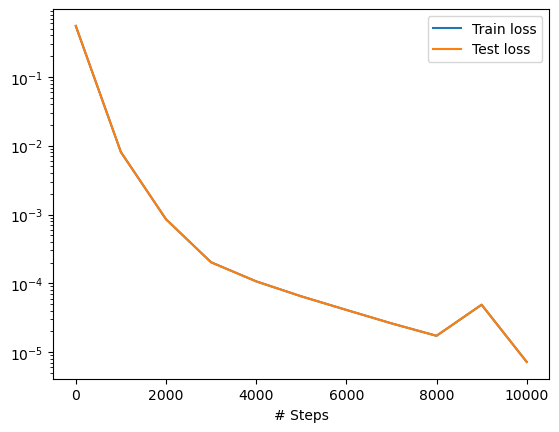

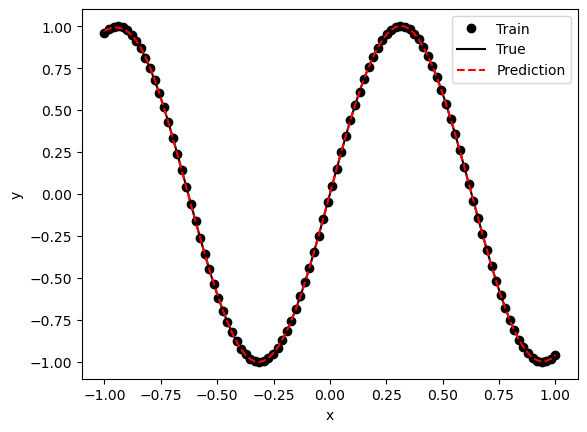

In [1]:
# Siimple Sinusoidal Equation
# Import Library 
import deepxde as dde
import numpy as np
import sympy as sy

# Plot Equation 
sy.init_printing(use_latex='mathjax')
x=sy.symbols('x')
y=sy.sin(5 * x)
display(y)

# Define function
def func(x):
    return np.sin(5 * x)

# Geometry: the domain of the function
geom = dde.geometry.Interval(-1, 1)

# Residual point allocation
num_train = 100
num_test = 100

# Data compile
data = dde.data.Function(geom, func, num_train, num_test)

# Neural network: 1 input layer (dimension of x), 2 hidden layers of 20 neurons each, 1 output layer
layer_size = [1] + [20]*2 + [1]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.maps.FNN(layer_size, activation, initializer)

# Model compile
model = dde.Model(data, net)
model.compile("adam", lr=0.001)
# Model training 
losshistory, train_state = model.train(epochs=10000)
# Save and plot the result 
dde.saveplot(losshistory,train_state,issave=True,isplot=True)

    3                
   x                 
──────── + x⋅sin(5⋅x)
sin(2⋅x)             

Compiling model...
Building feed-forward neural network...
'build' took 0.038781 s

'compile' took 0.149144 s

Training model...

Step      Train loss    Test loss     Test metric
0         [2.02e-01]    [2.02e-01]    []  
1000      [3.03e-02]    [3.03e-02]    []  
2000      [2.95e-02]    [2.95e-02]    []  
3000      [4.33e-03]    [4.33e-03]    []  
4000      [2.56e-03]    [2.56e-03]    []  
5000      [6.39e-04]    [6.39e-04]    []  
6000      [1.86e-04]    [1.86e-04]    []  
7000      [8.87e-05]    [8.87e-05]    []  
8000      [4.58e-05]    [4.58e-05]    []  
9000      [2.26e-05]    [2.26e-05]    []  
10000     [9.88e-06]    [9.88e-06]    []  

Best model at step 10000:
  train loss: 9.88e-06
  test loss: 9.88e-06
  test metric: []

'train' took 4.201897 s

Saving loss history to c:\Users\yesda\Desktop\PINN File\PINN Examples\loss.dat ...
Saving training data to c:\Users\yesda\Desktop\PINN File\PINN Examples\train.dat ...
Saving test data to c:\Users\yesda\Desktop\PINN File\PINN Examp

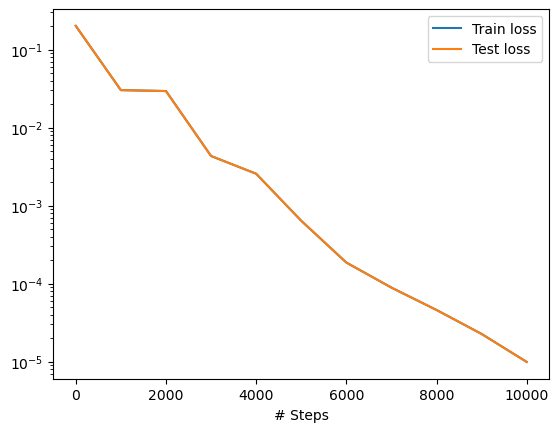

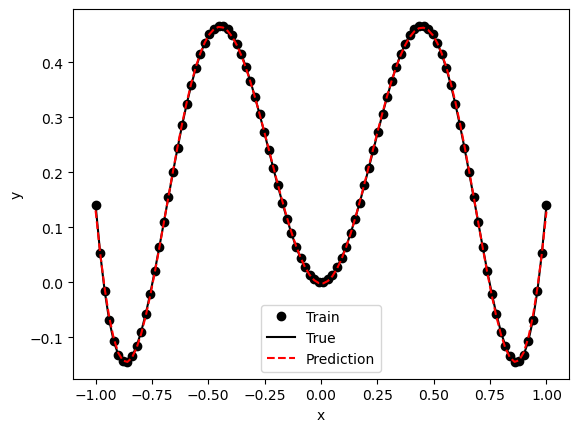

In [2]:
# Damped sine wave
# Import libraries
# Backend selection
import os
os.environ['DDE_BACKEND'] = 'tensorflow.compat.v1'
import deepxde as dde
import numpy as np
import sympy as sy

# Plot equation
sy.init_printing(use_latex='mathjax')
x=sy.symbols('x')
y=x *sy.sin(5 * x)+x**3/(sy.sin(2*x))
display(y)

# Define PDE
def func(x):
    return x * np.sin(5 * x)+x**3/(np.sin(2*x))

# Define geometry domain (No time domain is required here, so no need to compile them)
geom = dde.geometry.Interval(-1, 1)

# Data compile
data = dde.data.Function(geom, func,num_train=100,num_test=100)

# Netwrok structure
net = dde.maps.FNN([1] + [20] * 2 + [1], "tanh","Glorot uniform")

# Model Compile
model = dde.Model(data, net)
model.compile("adam",lr=0.001)

# Training
losshistory, train_state = model.train(iterations=10000)
# Save and plot the result
dde.saveplot(losshistory, train_state, issave=True, isplot=True)